In [1]:
import stk
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import nglview

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol


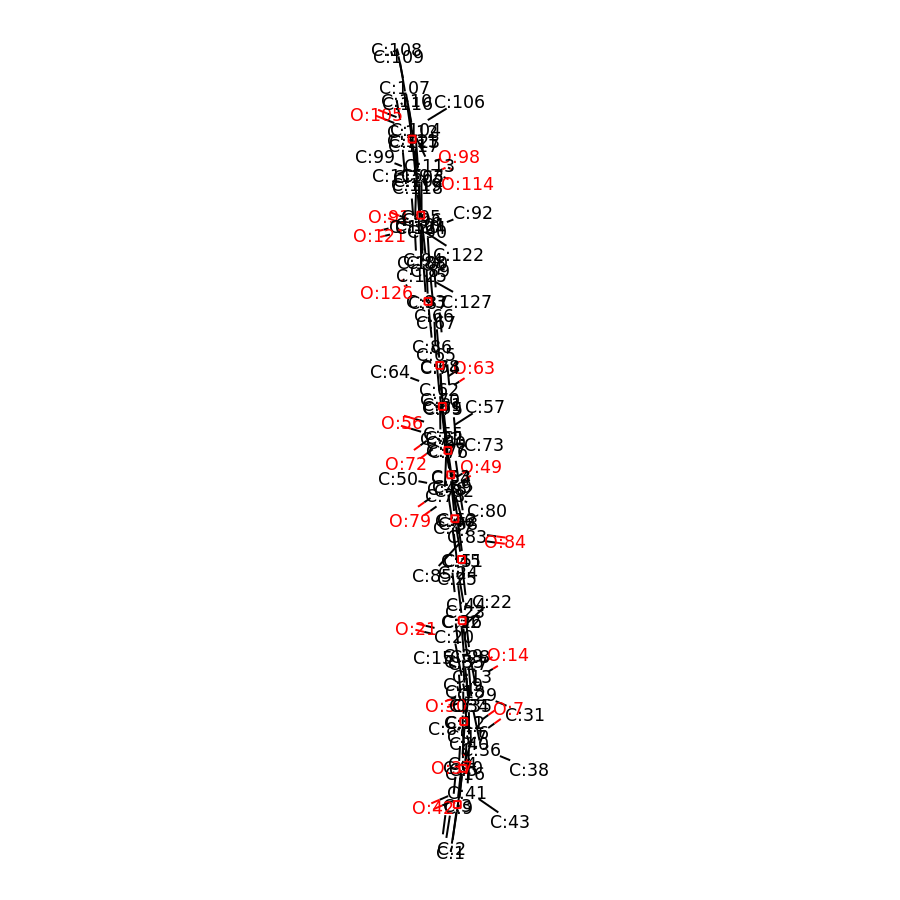

c1[cH:1][cH:2][c:3]2[c:4]([c:5]1[C:6](=[O:7])[CH3:8])[c:12]([C:13](=[O:14])[CH3:15])[c:11]1[c:10]([cH:9]2)[cH:16][c:17]2[c:18]([c:19]1[C:20](=[O:21])[CH3:22])[cH:39][c:33]1[cH:32][c:26]3[cH:25][c:24]4[c:23]([c:28]([C:29](=[O:30])[CH3:31])[c:27]3[c:35]([C:36](=[O:37])[CH3:38])[c:34]1[c:40]2[C:41](=[O:42])[CH3:43])[cH:44][c:45]1[c:46]([c:47]4[C:48](=[O:49])[CH3:50])[c:54]([C:55](=[O:56])[CH3:57])[c:53]2[c:52]([cH:51]1)[cH:58][c:59]1[c:60]([c:61]2[C:62](=[O:63])[CH3:64])[cH:81][c:75]2[cH:74][c:68]3[cH:67][c:66]4[c:65]([c:70]([C:71](=[O:72])[CH3:73])[c:69]3[c:77]([C:78](=[O:79])[CH3:80])[c:76]2[c:82]1[C:83](=[O:84])[CH3:85])[cH:86][c:87]1[c:88]([c:89]4[C:90](=[O:91])[CH3:92])[c:96]([C:97](=[O:98])[CH3:99])[c:95]2[c:94]([cH:93]1)[cH:100][c:101]1[c:102]([c:103]2[C:104](=[O:105])[CH3:106])[cH:123][c:117]2[cH:116][c:110]3[cH:109][cH:108][cH:107][c:112]([C:113](=[O:114])[CH3:115])[c:111]3[c:119]([C:120](=[O:121])[CH3:122])[c:118]2[c:124]1[C:125](=[O:126])[CH3:127]


NGLWidget()

In [2]:

# file = Path.cwd().parent / 'molecules' / 'xor_gate_8' / 'XORgateNo8.mol'
# file = Path.cwd().parent / 'molecules' / 'xor3_gate_6' / 'XOR3gate6.mol'
# file = Path.home() / 'conformer-ml' / 'debug_silly.mol'
file = Path.home() / 'conformer-ml' / 'debug.mol'
# file = Path.home() / 'conformer-ml' / 'polymer.mol'
mol = Chem.MolFromMolFile(str(file))
# mol = Chem.rdmolops.AddHs(mol, addCoords=True)
AllChem.MMFFOptimizeMolecule(mol, confId=0, maxIters=20000)
# Chem.rdMolTransforms.SetDihedralDeg(mol.GetConformer(id=0),5,12,14,15, 180.0)

display(Draw.MolToImage(mol_with_atom_index(mol),size=(900,900)))
# mol = Chem.MolFromSmiles('CC(=O)c1ccc(C(C)=O)c2c(C(C)=O)c3c(C(C)=O)c4cc5cc6c(C(C)=O)c7c(C(C)=O)c8c(C(C)=O)c9cc%10cc%11c(C(C)=O)c%12c(C(C)=O)c%13c(C(C)=O)ccc(C(C)=O)c%13c(C(C)=O)c%12c(C(C)=O)c%11cc%10cc9c(C(C)=O)c8c(C(C)=O)c7c(C(C)=O)c6cc5cc4c(C(C)=O)c3c(C(C)=O)c12')
# mol = Chem.MolFromSmiles('CC(=O)c1cccc2cccc(C(C)=O)c12')
# mol = Chem.MolFromSmiles('c')
print(Chem.MolToSmiles(mol))
# Chem.Draw.MolToImage(mol)
nglview.show_rdkit(mol)

[[4, 5, 10, 13], [4, 6, 11, 15]]


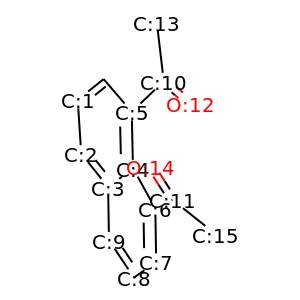

In [2]:
from rdkit.Chem import TorsionFingerprints

file = Path.cwd().parent / 'molecules' / 'xor_gate_cache' / 'XORgateNo.mol'
mol = Chem.MolFromMolFile(str(file))
AllChem.MMFFOptimizeMolecule(mol, confId=0, maxIters=20000)

nonring, ring = TorsionFingerprints.CalculateTorsionLists(mol)
nonring = [list(atoms[0]) for atoms, ang in nonring]


print(nonring)
Chem.rdMolTransforms.SetDihedralDeg(mol.GetConformer(id=0),0,5,10,12, 180.0)
display(Draw.MolToImage(mol_with_atom_index(mol),size=(300,300)))

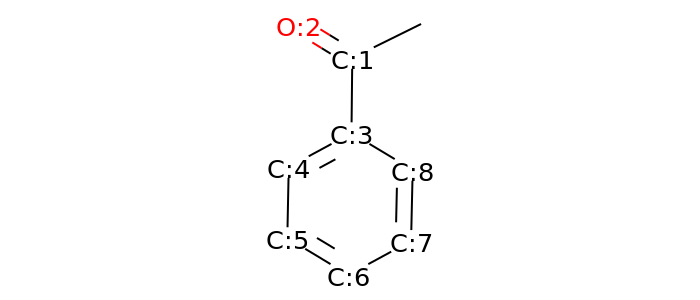

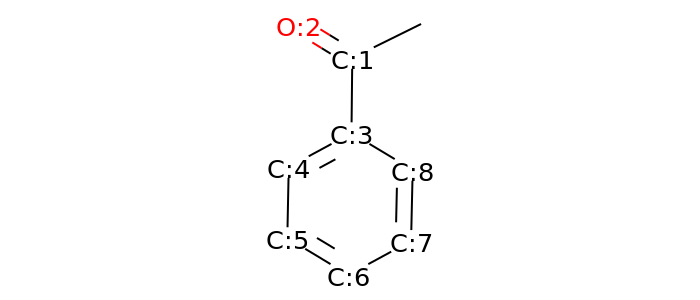

/home/joshkamm/conformer-ml/notebooks
[[0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  2.  1.  0.  0.  0.  0.  0. ]
 [0.  2.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  1.5 0.  0.  0.  1.5]
 [0.  0.  0.  1.5 0.  1.5 0.  0.  0. ]
 [0.  0.  0.  0.  1.5 0.  1.5 0.  0. ]
 [0.  0.  0.  0.  0.  1.5 0.  1.5 0. ]
 [0.  0.  0.  0.  0.  0.  1.5 0.  1.5]
 [0.  0.  0.  1.5 0.  0.  0.  1.5 0. ]]


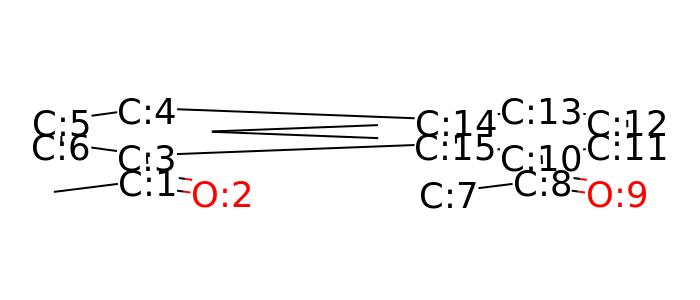

NGLWidget()

In [4]:
file = Path.cwd().parent / 'molecules' / 'xor_gate_cache' / 'XORBuildingBlock.mol'
mol = Chem.MolFromMolFile(str(file))
mol = Chem.rdmolops.RemoveHs(mol)
AllChem.MMFFOptimizeMolecule(mol, confId=0, maxIters=20000)
display(Draw.MolToImage(mol_with_atom_index(mol),size=(700,300)))

# building_block = stk.BuildingBlock('BrCCBr', [stk.BromoFactory()])
c_0, c_1, c_2, c_3, c_4, c_5 = stk.C(6), stk.C(7), stk.C(8), stk.C(3), stk.C(5), stk.C(4)
functional_groups = [stk.GenericFunctionalGroup(atoms=(c_0, c_1, c_2, c_3, c_4, c_5),
                                                bonders=(c_1, c_2), deleters=()),
                     stk.GenericFunctionalGroup(atoms=(c_0, c_1, c_2, c_3, c_4, c_5),
                                                bonders=(c_0, c_3), deleters=(c_4, c_5))]
building_block = stk.BuildingBlock.init_from_rdkit_mol(mol, functional_groups=functional_groups)
# mol = stk.BuildingBlock.init_from_rdkit_mol(mol, functional_groups=functional_groups).to_rdkit_mol()
display(Draw.MolToImage(mol_with_atom_index(mol),size=(700,300)))
# building_block = stk.BuildingBlock.init_from_file(str(file), functional_groups=functional_groups)
reaction = stk.molecular.factories.GenericReactionFactory(
    bond_orders= {frozenset({stk.GenericFunctionalGroup}): 2}
)
polymer = stk.ConstructedMolecule(
    topology_graph=stk.polymer.Linear(
        building_blocks=(building_block,),
        repeating_unit='A',
        num_repeating_units=2,
        reaction_factory=reaction
        # orientations=(0,1)
    )
)
print(Path.cwd())
polymer.write('polymer.mol')
print(Chem.rdmolops.GetAdjacencyMatrix(mol, useBO=True))
mol = polymer.to_rdkit_mol()
# mol = Chem.rdmolops.AddHs(mol, addCoords=True)
# AllChem.SanitizeMol(mol)
# AllChem.MMFFOptimizeMolecule(mol, confId=0)
# JOSH - RESUME HERE - try passing smiles

display(Draw.MolToImage(mol_with_atom_index(mol),size=(700,300)))
nglview.show_rdkit(mol)

In [9]:
# Stuff from working with Troy

mol = Chem.MolFromSmiles('C=C')
mol = Chem.rdmolops.AddHs(mol)
print(Chem.MolToSmiles(mol))
print(Chem.rdmolops.GetAdjacencyMatrix(mol,useBO=False))
# mol = mol.add
# nglview.show_rdkit(mol)

[H]C([H])=C([H])[H]
[[0 1 1 1 0 0]
 [1 0 0 0 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]
